# Laboratorio 1

Bienvenidos al primer laboratorio de Deep Learning y Sistemas Inteligentes. 
Espero que este laboratorio les sirva para consolidar sus conocimientos de las primeras dos semanas. 

Este laboratorio consta de dos partes. En la primera trabajaremos una Regresión Logística con un acercamiento más a una Red Neuronal. En la segunda fase, usaremos PyTorch para crear un modelo similar pero ya usando las herramientas de Deep Learning aunque aún implementando algunos pasos "a mano".

Para este laboratorio estaremos usando una herramienta para Jupyter Notebooks que facilitará la calificación, no solo asegurándo que ustedes tengan una nota pronto sino también mostrandoles su nota final al terminar el laboratorio.

Por favor noten que es primera vez que uso este acercamiento para laboratorios por ende, pido su compresión y colaboración si algo no funciona como debería. Ayúdenme a mejorarlo para las proximas iteraciones.

## Antes de Empezar
Por favor actualicen o instalen la siguiente librería que sirve para visualizaciones de la calificacion, además de otras herramientas para calificar mejor las diferentes tareas.
Pueden correr el comando mostrado abajo (quitando el signo de comentario) y luego reiniciar el kernel (sin antes volver a comentar la linea), o bien, pueden hacerlo sdesde una cmd del ambiente de Anaconda

##### Creditos:
Esta herramienta pertence a sus autores, Dr John Williamson et al.

In [ ]:
pip install -U --force-reinstall --no-cache https://github.com/johnhw/jhwutils/zipball/master

     \ 38.1 kB 309.8 kB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for jhwutils: filename=jhwutils-1.0-py3-none-any.whl size=33801 sha256=78151ac1a9f03b52b8e6f89b9b58093ae01cf1465a3c8faef8b7112ca82e54af
  Stored in directory: /private/var/folders/h4/rlgjjv6s50z2sflx2_9bt49h0000gn/T/pip-ephem-wheel-cache-k5hmws_r/wheels/27/3c/cb/eb7b3c6ea36b5b54e5746751443be9bb0d73352919033558a2
Successfully built jhwutils
Note: you may need to restart the kernel to use updated packages.


La librería previamente instalada también tiene una dependencia, por lo que necesitarán instalarla.

In [3]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import scipy
from PIL import Image
import os

# Other imports
from unittest.mock import patch
from uuid import getnode as get_mac

from jhwutils.checkarr import array_hash, check_hash, check_scalar, check_string
import jhwutils.image_audio as ia
import jhwutils.tick as tick

###
tick.reset_marks()

%matplotlib inline

In [ ]:
# Hidden cell for utils needed when grading (you can/should not edit this)
# Celda escondida para utlidades necesarias, por favor NO edite esta celda


###### Información del estudiante en dos variables

* carne : un string con su carne (e.g. "12281"), debe ser de al menos 5 caracteres.
* firma_mecanografiada: un string con su nombre (e.g. "Albero Suriano") que se usará para la declaracion que este trabajo es propio (es decir, no hay plagio)

In [3]:
carne = "201011"
firma_mecanografiada = "Fredy Velasquez"


In [4]:
# Deberia poder ver dos checkmarks verdes [0 marks], que indican que su información básica está OK 

with tick.marks(0): 
    assert(len(carne)>=5)

with tick.marks(0):  
    assert(len(firma_mecanografiada)>0)

#### Dataset a Utilizar

Para este laboratorio estaremos usando el dataset de Kaggle llamado [Cats and Dogs image classification](https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification).
Por favor, descarguenlo y ponganlo en una carpeta/folder de su computadora local.

## Parte 1 - Regresión Logística como Red Neuronal

**Créditos:** La primera parte de este laboratorio está tomado y basado en uno de los laboratorios dados dentro del curso de "Neural Networks and Deep Learning" de Andrew Ng

In [3]:
# Por favor cambien esta ruta a la que corresponda en sus maquinas
data_dir = './Images/'

train_images = []
train_labels = []
test_images = []
test_labels = []

def read_images(folder_path, label, target_size, color_mode='RGB'):
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        # Use PIL to open the image
        image = Image.open(image_path)
        
        # Convert to a specific color mode (e.g., 'RGB' or 'L' for grayscale)
        image = image.convert(color_mode)
        
        # Resize the image to the target size
        image = image.resize(target_size)

        # Convert the image to a numpy array and add it to the appropriate list
        if label == "cats":
            if 'train' in folder_path:
                train_images.append(np.array(image))
                train_labels.append(0)  # Assuming 0 represents cats
            else:
                test_images.append(np.array(image))
                test_labels.append(0)  # Assuming 0 represents cats
        elif label == "dogs":
            if 'train' in folder_path:
                train_images.append(np.array(image))
                train_labels.append(1)  # Assuming 1 represents dogs
            else:
                test_images.append(np.array(image))
                test_labels.append(1)  # Assuming 1 represents dogs
# Call the function for both the 'train' and 'test' folders
train_cats_path = os.path.join(data_dir, 'train', 'cats')
train_dogs_path = os.path.join(data_dir, 'train', 'dogs')
test_cats_path = os.path.join(data_dir, 'test', 'cats')
test_dogs_path = os.path.join(data_dir, 'test', 'dogs')


# Read images
target_size = (64, 64)
read_images(train_cats_path, "cats", target_size)
read_images(train_dogs_path, "dogs", target_size)
read_images(test_cats_path, "cats", target_size)
read_images(test_dogs_path, "dogs", target_size)

In [4]:
# Convert the lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Reshape the labels
train_labels = train_labels.reshape((1, len(train_labels)))
test_labels = test_labels.reshape((1, len(test_labels)))

y = 0, es una imagen de un gato


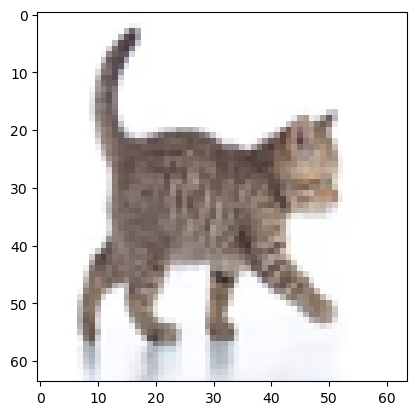

In [5]:
# Ejemplo de una imagen
index = 25
plt.imshow(train_images[index])
print ("y = " + str(train_labels[0][index]) + ", es una imagen de un " + 'gato' if train_labels[0][index]==0 else 'perro' +  "'.")

### Ejercicio 1
Para este primer ejercicio, empezaremos con algo súper sencillo, lo cual será soalmente encontrar los valores de las dimensiones de los vectores con los que estamos trabajando
 * m_train: número de ejemplos de entrenamiento
 * m_test: número de ejemplos de testing
 * num_px: Alto y ancho de las imagenes

In [7]:
#(Aproximadamente, 3 líneas de código)
#Calculamos el número de entramientos
m_train = 0
m_test = 0
num_px = 64

for root, dirs, files in os.walk("./Images/test/"):
   #Comparamos si se encuentra cats o dogs
   if "cats" in root or "dogs" in root:
      m_test+=len(files)

#Ahora hacemos lo mismo pero con train
for root, dirs, files in os.walk("./Images/train/"):
   #Comparamos si se encuentra cats o dogs
   if "cats" in root or "dogs" in root:
      m_train+=len(files)

print ("Número de datos en entrenamiento: m_train = " + str(m_train))
print ("Número de datos en testing: m_test = " + str(m_test))
print ("Alto y ancho de cada imagen: num_px = " + str(num_px))
print ("Cada imagen tiene un tamañado de: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))

Número de datos en entrenamiento: m_train = 557
Número de datos en testing: m_test = 140
Alto y ancho de cada imagen: num_px = 64
Cada imagen tiene un tamañado de: (64, 64, 3)
train_images shape: (557, 64, 64, 3)
train_labels shape: (1, 557)
test_images shape: (140, 64, 64, 3)
test_labels shape: (1, 140)


In [8]:
with tick.marks(2):
    assert m_train == 557
with tick.marks(2):
    assert m_test == 140
with tick.marks(1):
    assert num_px == 64

### Ejercicio 2
 
 Para conveniencia, deberán cambiar la forma (reshape) de las imagenes (num_px, num_px, 3) en cada numpy-array a una forma de (num_px $*$ num_px $*$ 3, 1). De esta manera, tanto el training como testing dataset sera un numpy-array donde cada columna representa una imagen "aplanada". Deberán haber m_train y m_test columnas
 

Entonces, para este ejercicio deben cambiar la forma (reshape) de tanto el dataset de entrenamiento como el de pruebas (training y testing) de esa forma, obtener un vector de la forma mencionada anteriormente (num\_px $*$ num\_px $*$ 3, 1)

Una forma de poder "aplanar" una matriz de forma (a,b,c,d) a una matriz de de forma (b$*$c$*$d, a), es usar el método "reshape" y luego obtener la transpuesta

```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T es la transpuesta de X
```

In [9]:
# Aplanar el dataset de entrenamiento
train_images_flatten = train_images.reshape(train_images.shape[0], -1).T

# Aplanar el dataset de pruebas
test_images_flatten = test_images.reshape(test_images.shape[0], -1).T

print("train_images_flatten shape:", train_images_flatten.shape)
print("train_labels shape:", train_labels.shape)
print("test_images_flatten shape:", test_images_flatten.shape)
print("test_labels shape:", test_labels.shape)

train_images_flatten shape: (12288, 557)
train_labels shape: (1, 557)
test_images_flatten shape: (12288, 140)
test_labels shape: (1, 140)


In [ ]:


# Test escondido para revisar algunos pixeles de las imagenes en el array aplanado 
# Tanto en training [3 marks]
# Como en test [2 marks]

Para representar el color de las imagenes (rojo, verde y azul - RGB) los canales deben ser específicados para cada pixel, y cada valor de pixel es de hecho un vector de tres números entre 0 y 255.

Una forma muy comun de preprocesar en ML es el centrar y estandarizar el dataset, es decir que se necesita restar la media de todo el array para cada ejemplo, y luego dividir cada observacion por la desviación estándar de todo el numpy array. Pero para dataset de imagenes, es más simple y más conveniente además que funciona tan bien, el solo dividir cada fila del dataset por 255 (el máximo del valor de pixeles posible.

Por ello, ahora estandarizaremos el dataset


In [11]:
train_set_x = train_images_flatten / 255.
test_set_x = test_images_flatten / 255.

train_set_x
test_set_x

array([[0.80784314, 0.0627451 , 0.31764706, ..., 0.05490196, 0.38039216,
        0.58039216],
       [0.78431373, 0.04705882, 0.19215686, ..., 0.04705882, 0.38823529,
        0.54509804],
       [0.78431373, 0.04313725, 0.18431373, ..., 0.03529412, 0.37254902,
        0.5254902 ],
       ...,
       [0.78431373, 0.14117647, 0.99607843, ..., 0.54901961, 0.56862745,
        0.5254902 ],
       [0.6745098 , 0.04313725, 0.99215686, ..., 0.54901961, 0.48235294,
        0.48627451],
       [0.61960784, 0.04313725, 0.99215686, ..., 0.56078431, 0.41960784,
        0.24313725]])

### Arquitectura General
Ahora empezaremos a construir un algoritmo que nos permita diferenciar perros de gatos.

Para esto estaremos construyendo una Regresión Logística, usando un pensamiento de una Red Neuronal. Si se observa la siguiente imagen, se puede apreciar porque hemos dicho que la **Regresión Logística es de hecho una Red Neuronal bastante simple.** 

Recordemos la expresión matematica vista en clase.

Por ejemplo para una observación $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{4}$$



Recordemos que los pasos más importantes para construir una Red Neuronal son:
1. Definir la estructura del modelo (como el número de features de entrada)
2. Inicializar los parámetros del modelo
3. Iterar de la siguiente forma:
    a. Calcular la pérdida (forward)
    b. Calcular el gradiente actual (backward propagation)
    c. Actualizar los parámetros (gradiente descendiente)

Usualmente se crean estos pasos de forma separada para luego ser integrados en una función llamada "model()"

Antes de continuiar, necesitamos definir una función de soporte, conocida como sigmoide
Recuerden que para hacer predicciones, necesitamos calcular: 
$sigmoid(z) = \frac{1}{1 + e^{-z}}$ para $z = w^T x + b$


In [12]:
def sigmoid(z):
    """
    Computa el valor sigmoide de z

    Arguments:
    z: Un escalar o un numpy array 

    Return:
    s: sigmoide(z)
    """
    s = 1 / (1 + np.exp(-z))
        
    return s

### Ejercicio 3 - Inicializando parámetros con cero

Implemente la inicialización de parámetros. Tiene que inicializar w como un vector de zeros, considere usar np.zeros()

In [13]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    Crea un vector de zeros de dimensión (dim, 1) para w, inicia b como cero

    Argument:
    dim: Tamaño

    Returns:
    w: Vector w (dim, 1)
    b: Escalar, debe ser flotante
    """

    # Aprox 2 línas de código
    w = np.zeros((dim,1))
    b = 0

    return w, b

In [14]:
dim = 3 # No cambiar esta dimensión por favor
w, b = initialize_with_zeros(dim)

print ("w = " + str(w))
print ("b = " + str(b))



w = [[0.]
 [0.]
 [0.]]
b = 0


### Ejercicio 4 - Forward and Backward propagation
Tras inicializar los parámetros, necesitamos hacer el paso de "forward" y "backward propagation" para optimizar los parámetros.

Para empezar, implemente la función "propagate()" que calcula la función de costo y su gradiente. 

**Recuerde**
* Si tiene X
* Se puede calcular $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
* Y luego se puede calcular la función de costo: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Por ende recuerd estas fórmulas (que probablemente estará usando):
$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{5}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{6}$$


In [15]:
def propagate(w, b, X, Y):
    # Forward propagation
    # Aproximadamente 2 líneas de código para:
    # A =
    # C =
    # Recuerde que no debe usar ciclos y considere usar np.dot
    # Backward propagation
    # Aproximadamente 2 líneas de código para:
    # dw =
    # db =
    # Es decir, se esperan aprox 4 líneas de código
    # YOUR CODE HERE

    m = X.shape[1]
    # Forward propagation
    Z = np.dot(w.T, X) + b
    A = 1 / (1 + np.exp(-Z))
    C = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    # Backward propagation
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    cost = np.squeeze(np.array(C))


    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [17]:
w =  np.array([[1.], [3]])
b = 4.5
X = np.array([[2., -2., -3.], [1., 1.5, -5.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)


print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))





with tick.marks(0): 
    assert type(grads["dw"]) == np.ndarray
with tick.marks(0): 
    assert grads["dw"].shape == (2, 1)
with tick.marks(0): 
    assert type(grads["db"]) == np.float64



dw = [[ 0.00055672]
 [-0.00048178]]
db = -0.0003283816747260056
cost = 0.000329022626806518


### Ejercicio 5 - Optimización

Escriba una función de optimización. El objetivo es aprender $w$ y $b$ al minimizar la función de costo $J$. Para un parametro $\theta$, la regla de actualización es $ \theta = \theta - \alpha \text{ } d\theta$, donde $\alpha$ es el learning rate.


In [18]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)

    costs = []

    for i in range(num_iterations):
        # Forward and Backward propagation
        grads, cost = propagate(w, b, X, Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # Update parameters using element-wise operations (no matrix multiplication)
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

            # Print the cost every 100 training iterations
            if print_cost:
                print("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [19]:
# Recuerde NO cambiar esto por favor
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))


w = [[0.99949949]
 [3.00043321]]
b = 4.50029528361711
dw = [[ 0.00055554]
 [-0.00048091]]
db = -0.0003278045123969942
Costs = [array(0.00032902)]


### Ejercicio 6 - Predicción

Con w y b calculados, ahora podemos hacer predicciones del dataset. Ahora implemente la función "predict()". 
Considere que hay dos pasos en la función de predicción:

1. Calcular  $\hat{Y} = A = \sigma(w^T X + b)$
2. Convertir la entrada a un 0 (si la activación es <= 0.5) o 1 (si la activación fue > 0.5), y guardar esta predicción en un vector "Y_prediction". 

In [20]:
def predict(w, b, X):
    """
    Predice si las etiquetas son 0 o 1 usando los parámetros de regresión logística.

    Argumentos:
    w -- pesos, un arreglo numpy de tamaño (n, 1)
    b -- sesgo, un escalar
    X -- datos de entrada, un arreglo numpy de tamaño (n, m)

    Retorna:
    Y_prediction -- un arreglo numpy que contiene todas las predicciones (0/1) para los ejemplos en X
    """

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))

    w = w.reshape(X.shape[0], 1)  # Asegurar la forma correcta de los pesos

    # Calcular el vector A para predecir las probabilidades de ser 0 o 1
    A = 1 / (1 + np.exp(-(np.dot(w.T, X) + b)))
    print("Valores de A: ", A)

    # Aprox 4 lineas de codigo para convertir A[0,i] en una predicción:
    # if A[0, i] > ____ :
    #  Y_prediction[0,i] =
    # else:
    #  Y_prediction[0,i] =
    # YOUR CODE HERE

    for i in range(A.shape[1]):
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0

    return Y_prediction

In [21]:
w = np.array([[0.112368795], [0.48636775]])
b = -0.7
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
predictions_ = predict(w, b, X)
print ("predictions = " + str(predictions_))


Valores de A:  [[0.49900253 0.53721351 0.26679527]]
predictions = [[0. 1. 0.]]


### Ejercicio 7 - Modelo

Implemente la función "model()", usando la siguiente notación:
* Y_prediction_test para las predicciones del test set
* Y_prediction_train para las predicciones del train set
* parameters, grads, costs para las salidas de "optimize()"

In [22]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    # Inicializa los parámetros con ceros
    w,b = initialize_with_zeros(X_train.shape[0])

    # Realiza la optimización usando el descenso de gradiente
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Recupera los parámetros aprendidos
    w = params["w"]
    b = params["b"]

    # Predice los ejemplos de entrenamiento y prueba
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)

    # Imprime los errores de entrenamiento y prueba
    if print_cost:
        train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
        test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
        print("Precisión de entrenamiento: {} %".format(train_accuracy))
        print("Precisión de prueba: {} %".format(test_accuracy))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}

    return d

In [23]:
logistic_regression_model = model(train_set_x, train_labels, test_set_x, test_labels, num_iterations=2000, learning_rate=0.005, print_cost=True)



Cost after iteration 0: 0.693147
Cost after iteration 100: 2.052074
Cost after iteration 200: 1.878049
Cost after iteration 300: 1.758583
Cost after iteration 400: 1.663611
Cost after iteration 500: 1.582448
Cost after iteration 600: 1.509900
Cost after iteration 700: 1.442954
Cost after iteration 800: 1.379820
Cost after iteration 900: 1.319430
Cost after iteration 1000: 1.261168
Cost after iteration 1100: 1.204774
Cost after iteration 1200: 1.150262
Cost after iteration 1300: 1.097820
Cost after iteration 1400: 1.047688
Cost after iteration 1500: 1.000048
Cost after iteration 1600: 0.954979
Cost after iteration 1700: 0.912456
Cost after iteration 1800: 0.872356
Cost after iteration 1900: 0.834486
Valores de A:  [[8.26801116e-03 3.79625689e-03 9.66054123e-02 3.33166421e-03
  1.96949348e-01 2.21494027e-04 5.48055935e-04 5.37207749e-02
  1.99672889e-01 3.63367962e-03 3.07080562e-02 1.04091431e-02
  3.37798476e-03 5.68877854e-01 7.51981349e-01 6.55128316e-04
  1.54821998e-03 1.55426331e-

y = 0, predice que este es un "gato


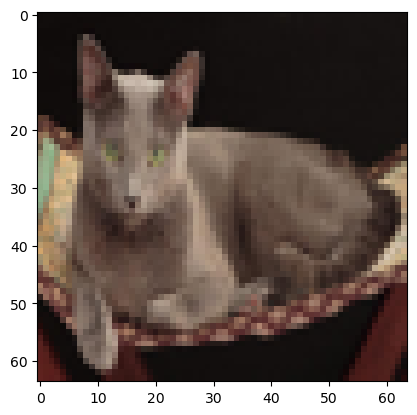

In [24]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3))) 
print ("y = " + str(test_labels[0,index]) + ", predice que este es un \"" + 'gato' if int(logistic_regression_model['Y_prediction_test'][0,index])==0 else 'perro' +  "\" picture.")

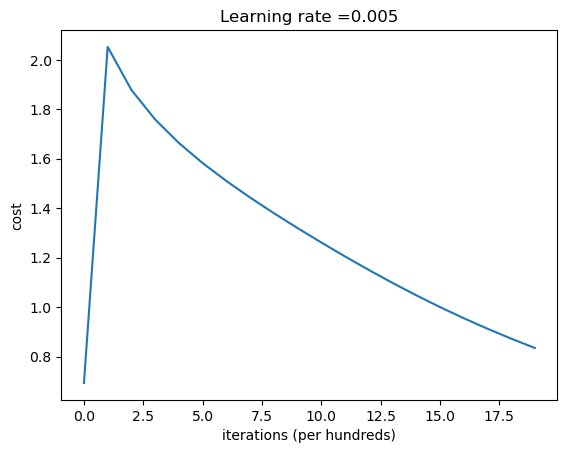

In [25]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

**NOTA:** Dentro de los comentarios de la entrega (en Canvas) asegurese de contestar
1. ¿Qué se podría hacer para mejorar el rendimiento de esta red?


Aplicar técnicas de regularización para evitar el sobreajuste es fundamental en el proceso de entrenamiento de modelos de aprendizaje automático. Una de las formas más efectivas de abordar este problema es aumentar la cantidad de datos de entrenamiento, lo que permite al modelo aprender patrones más generalizados y evitar depender demasiado de ejemplos específicos. Además, al aumentar el conjunto de datos, se obtiene una visión más completa y representativa del problema, lo que contribuye a una mejor capacidad de generalización.

Otro aspecto importante es seleccionar cuidadosamente las características más relevantes para el problema en cuestión. Al elegir las características adecuadas, se puede reducir el ruido y la dimensionalidad del conjunto de datos, lo que lleva a un modelo más preciso y eficiente. Es esencial realizar una exploración exhaustiva y un análisis detallado para determinar qué características son más informativas para el modelo.

Además, es fundamental experimentar con diferentes valores de hiperparámetros durante el proceso de entrenamiento. Hiperparámetros como la tasa de aprendizaje y el número de iteraciones pueden afectar significativamente el rendimiento y la convergencia del modelo. Probar diversas configuraciones ayuda a encontrar el equilibrio óptimo y garantiza un mejor desempeño en el conjunto de datos de prueba.

En algunos casos, especialmente cuando el problema es complejo y requiere una mayor capacidad de aprendizaje, es recomendable considerar arquitecturas más complejas. Estas arquitecturas pueden contener capas adicionales o neuronas para capturar patrones más intrincados y sutiles presentes en los datos. Sin embargo, es esencial evitar el sobreajuste durante este proceso y realizar un seguimiento cuidadoso del rendimiento del modelo en el conjunto de validación.

Además de la regularización y la selección de características, normalizar los datos es otra práctica importante. La normalización ayuda a escalar las características de manera uniforme, lo que evita problemas de escala y mejora la velocidad de convergencia del modelo durante el entrenamiento.

También se debe considerar el uso de diferentes funciones de activación para mitigar el problema del desvanecimiento de gradientes, especialmente en redes neuronales profundas. Al elegir funciones de activación apropiadas, se puede garantizar un flujo adecuado de información durante el proceso de propagación hacia atrás y, por lo tanto, mejorar la estabilidad y el rendimiento del modelo.


2. Interprete la gráfica de arriba


El gráfico ilustra la evolución del costo a medida que el modelo se entrena durante varias iteraciones. Inicialmente, observamos una disminución pronunciada del costo, lo que sugiere que el modelo está capturando los patrones y relaciones dentro de los datos, y está mejorando su rendimiento. Este descenso rápido indica un progreso significativo en la capacidad del modelo para realizar predicciones precisas.

Sin embargo, conforme avanzan las iteraciones, notamos que el costo comienza a estabilizarse en un valor determinado. Esta estabilización sugiere que el modelo ha alcanzado una solución cercana al óptimo para el problema dado. En este punto, el modelo ha aprendido lo máximo posible de los datos de entrenamiento y ha ajustado sus parámetros para aproximarse a los valores que minimizan el costo.

Es importante destacar que, durante el entrenamiento, debemos estar atentos a ciertas señales. Si después de cierto punto el costo comienza a aumentar en lugar de seguir disminuyendo, puede ser una señal de que el modelo está sobreajustando los datos de entrenamiento. El sobreajuste ocurre cuando el modelo se ha ajustado demasiado a los detalles idiosincrásicos o ruidosos de los datos de entrenamiento, perdiendo así la capacidad de generalización a nuevos datos.

## Parte 2 - Red Neuronal Simple con PyTorch

Para esta parte seguiremos usando el mismo dataset que anteriormente teníamos. 

Entonces volvamos a cargar las imagenes por paz mental :)

In [26]:
train_images = []
train_labels = []
test_images = []
test_labels = []

# Call the function for both the 'train' and 'test' folders
train_cats_path = os.path.join(data_dir, 'train', 'cats')
train_dogs_path = os.path.join(data_dir, 'train', 'dogs')
test_cats_path = os.path.join(data_dir, 'test', 'cats')
test_dogs_path = os.path.join(data_dir, 'test', 'dogs')


# Read images
target_size = (64, 64)
read_images(train_cats_path, "cats", target_size)
read_images(train_dogs_path, "dogs", target_size)
read_images(test_cats_path, "cats", target_size)
read_images(test_dogs_path, "dogs", target_size)


# Convert the lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

#### Nuevas librerías a usar
Asegúrense de instalar las librerías que les hagan falta del siguiente grupo de import.

**Recuerden usar virtual envs!**

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch.utils.data as data
import random


# Seed all possible
seed_ = 2023
random.seed(seed_)
np.random.seed(seed_)
torch.manual_seed(seed_)

# If using CUDA, you can set the seed for CUDA devices as well
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed_)
    torch.cuda.manual_seed_all(seed_)
    
import torch.backends.cudnn as cudnn
cudnn.deterministic = True
cudnn.benchmark = False

Para poder usar PyTorch de una mejor manera con nuestro dataset de imagenes, tendremos que "formalizar" la manera en que cargamos las imagenes. Para ello crearemos una clase que represente el Dataset con el que estaremos trabajando

In [28]:
class CatsAndDogsDataset(data.Dataset):
    def __init__(self, data_dir, target_size=(28, 28), color_mode='RGB', train=True):
        self.data_dir = data_dir
        self.target_size = target_size
        self.color_mode = color_mode
        self.classes = ['cats', 'dogs']
        self.train = train
        self.image_paths, self.labels = self.load_image_paths_and_labels()

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path)
        image = image.convert(self.color_mode)
        image = image.resize(self.target_size)
        image = np.array(image)
        image = (image / 255.0 - 0.5) / 0.5  # Normalize to range [-1, 1]
        image = torch.tensor(image, dtype=torch.float32)
        image = image.view(-1)

        label = torch.tensor(self.labels[idx], dtype=torch.long)

        return image, label

    def load_image_paths_and_labels(self):
        image_paths = []
        labels = []
        for class_idx, class_name in enumerate(self.classes):
            class_path = os.path.join(self.data_dir, 'train' if self.train else 'test', class_name)
            for filename in os.listdir(class_path):
                image_path = os.path.join(class_path, filename)
                image_paths.append(image_path)
                labels.append(class_idx)
        return image_paths, labels


### Definición de la red neuronal
Una de las formas de definir una red neuronal con PyTorch es através del uso de clases. En esta el constructor usualmente tiene las capas que se usaran, mientras que la función que se extiende "forward()" hace clara la relación entre las capas.

Para poder entenderlo, hay que leer desde la función más interna hacia afuera y de arriba hacia abajo. Por ejemplo, en la línea 8, la capa fc1 (que es una lineal), pasa luego a una función de activación ReLU, despues la información pasa a una segunda lineal (fc2), para finalmente pasar por una función de activación SoftMax

In [29]:
class SimpleClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))   # Feedforward step: Compute hidden layer activations
        x = self.fc2(x)              # Feedforward step: Compute output layer activations
        return F.log_softmax(x, dim=1)


### Definición de la función de entrenamiento

Una forma de entrenar una red neuronal con PyTorch es, tras haber definido el modelo, se pasa a definir una función que se encargará de realizar el entrenamiento. Esto incluye tanto el paso de feedforward como el de back propagation. 

Deberá terminar de implementar las funciones dadas según se solicita

In [33]:
loss_history = [] # DO NOT DELETE

def train_model(model, train_loader, optimizer, criterion, epochs):
    model.train()
    
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs = inputs.view(-1, input_size)

            # Feedforward step: Compute the predicted output
            outputs = model(inputs)
            # Aprox 1 a 3 líneas (depende del acercamiento), la salida debe ser:
            # outputs =
            # Pueden usar un acercamiento step-by-step (puntos extra)
            #     En esta deberían usar primero
            #     # hidden_layer_activations = # Usando torch.relu, torch.matmul
            #     # output_layer_activations = # Usando torch.matmul
            # O usar una forma más directa
            # YOUR CODE HERE

            # Compute the cost (loss)
            
            # Aprox 1 linea para calculo de la perdida
            # loss =
            # YOUR CODE HERE
            loss = criterion(outputs, labels)

            # Backpropagation step: Compute gradients of the loss with respect to the model's parameters

            # Aprox 2 lineas para:
            # Limpiar gradientes previas usnado el optimizer
            # Computar las gradientes usando autograd
            # YOUR CODE HERE
            optimizer.zero_grad()
            loss.backward()  

            # Update the model's parameters using the computed gradients

            # Aprox 1 linea para:
            # Hacer un paso en la optimización, usar el optimizer
            # YOUR CODE HERE
            optimizer.step()  

            running_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")
        loss_history.append(running_loss/len(train_loader))

    print("Training complete!")

In [34]:
input_size = 64 * 64 * 3
hidden_size = 125
output_size = 2  # 2 classes: cat and dog

model = SimpleClassifier(input_size, hidden_size, output_size)
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.NLLLoss()

# Loading datasets
train_dataset = CatsAndDogsDataset(data_dir, target_size=(64, 64), color_mode='RGB', train=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

In [35]:
train_model(model, train_loader, optimizer, criterion, epochs=5)

Epoch 1/5, Loss: 0.6884258985519409
Epoch 2/5, Loss: 0.6384948955641853
Epoch 3/5, Loss: 0.6031673749287924
Epoch 4/5, Loss: 0.5644171718094084
Epoch 5/5, Loss: 0.5456851025422415
Training complete!


In [36]:
print("Loss:", loss_history)


Loss: [0.6884258985519409, 0.6384948955641853, 0.6031673749287924, 0.5644171718094084, 0.5456851025422415]


También necesitamos una forma de probar nuestro modelo para ello usamos la siguiente

In [37]:
def test_model(model, test_loader):
    """
    Evaluate the performance of a trained neural network model on the test data.

    Arguments:
    model: The trained neural network model to be evaluated.
    test_loader: The DataLoader containing the test data and labels.
    """

    model.eval()  # Set the model in evaluation mode

    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.view(-1, input_size)
            labels = labels.view(-1)  # Reshape the labels to be compatible with NLLLoss()

            # Forward pass
            outputs = model(inputs)

            # Get predictions
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy

In [38]:
test_dataset = CatsAndDogsDataset(data_dir, target_size=(64, 64), color_mode='RGB', train=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

In [39]:
# Evaluate the model on the test dataset
asset_accuracy = test_model(model, test_loader)

asset_accuracy


Test Accuracy: 55.71%


**NOTA:** Dentro de los comentarios de la entrega (en Canvas) asegurese de contestar
    
3. ¿En qué consiste ```optim.SGD```?

Es un algoritmo de optimización utilizado en el entrenamiento de modelos de aprendizaje automático, especialmente en redes neuronales. Su objetivo es ajustar los parámetros del modelo para minimizar la función de pérdida, que mide la diferencia entre las predicciones del modelo y los valores reales de los datos de entrenamiento.

4. ¿En qué consiste ```nn.NLLLoss```?

Es una función de pérdida específica de PyTorch. Esta función de pérdida se utiliza comúnmente en problemas de clasificación en los que se tiene un conjunto de clases y se desea que el modelo asigne una probabilidad a cada clase para una determinada entrada.

5. ¿Qué podría hacer para mejorar la red neuronal, y si no hay mejoras, por qué?

Una manera de mejorar la capacidad de un modelo de aprendizaje sería aumentando el número de nodos y capas en su arquitectura. Esto permitiría capturar detalles más finos y complejos en los datos, lo que podría mejorar el rendimiento del modelo en tareas más complicadas. Sin embargo, esta estrategia conlleva una preocupación importante: la complejidad computacional. Cuantos más nodos y capas se agreguen, más operaciones matemáticas se deben realizar durante el entrenamiento y la predicción. Esto puede llevar a un aumento significativo en el tiempo de entrenamiento y consumo de recursos, lo que podría ser inviable en sistemas con limitaciones de capacidad de cómputo.

Otra forma de abordar el problema del sobreajuste y evitar la sobrecarga de recursos es mediante el uso de técnicas de regularización, como el apagado aleatorio de algunas neuronas durante el entrenamiento. Esta técnica, llamada "dropout", consiste en desactivar aleatoriamente un porcentaje de neuronas durante cada paso de entrenamiento. Esto evita que las neuronas dependan demasiado de las conexiones particulares y, en cambio, fomenta que trabajen de manera más independiente y robusta. Como resultado, el modelo tiende a generalizar mejor y a ser menos sensible a ruido o variaciones en los datos de entrenamiento. Además, el "dropout" ayuda a reducir la sobrecarga de recursos, ya que disminuye el número de cálculos necesarios durante el entrenamiento.

Otra posibilidad para mejorar el rendimiento del modelo es aumentar el número de épocas de entrenamiento. Las épocas representan el número de veces que el modelo recorre todo el conjunto de datos de entrenamiento durante el proceso de entrenamiento. Al incrementar las épocas, el modelo tiene más oportunidades de ajustar sus parámetros y aprender de manera más profunda y precisa los patrones presentes en los datos. Sin embargo, esto también conlleva el riesgo de aumentar la complejidad computacional, especialmente si el conjunto de datos es grande. En algunos casos, un gran número de épocas podría llevar a un tiempo de entrenamiento excesivamente largo o incluso a una sobrecarga en el uso de recursos.

Al preguntarlse "en qué consiste...", se espera que las expliquelas en sus propias palabras

## Calificación

**Asegúrese de que su notebook corra sin errores (quite o resuelva los raise NotImplementedError()) y luego reinicie el kernel y vuelva a correr todas las celdas para obtener su calificación correcta**

In [42]:

print()
print("La fraccion de abajo muestra su rendimiento basado en las partes visibles de este laboratorio")
tick.summarise_marks() # 
print(tick.summarise_marks())



La fraccion de abajo muestra su rendimiento basado en las partes visibles de este laboratorio
